In [99]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special
import math    


def  busquedaBinaria(A ,query):
    mitad = math.floor(len(A)/2)
    if(A[mitad] == query):
        return A[mitad]
    if(query >= A[mitad]):
        return (busquedaBinaria(A[mitad:len(A)],query))
    else:
        return (busquedaBinaria(A[0:mitad],query))
    
def busquedaTernaria(A, query):
    mitadTernaria = math.floor(len(A)/3)
    n = len(A)
    if n <= 3:
        #print("Busqueda Secuencial dentro del ternario", A)
        return busquedaSecuencial(A,query)
    else:
        if query <= A[(mitadTernaria -1)]:
            #print("Busqueda en la parte inicial del array:",A[0:mitadTernaria])
            return busquedaTernaria(A[0:mitadTernaria],query)
        else: 
            if query <= A[(math.floor(len(A)*(2/3)))-1]:
                #print("Busqueda en el medio:",A[mitadTernaria:math.floor(len(A)*(2/3))])
                return busquedaTernaria(A[mitadTernaria:math.floor(len(A)*(2/3))],query)
            else:
                #print("Busqueda en la parte final del array:",A[math.floor(len(A)*(2/3)):len(A)])
                return busquedaTernaria(A[math.floor(len(A)*(2/3)):len(A)],query)
    
def busquedaSecuencial(A,query):
    l = len(A)
    n = 0
    res = -1
    print()
    while l != n:
        if A[n] == query:
            res = A[n]
            #print("Searched!:",res)
            break
        else:
            n = n+1
    return res    
    
    
def generateArrayOrdenado(n):
    t =0
    res = []
    while  t != n:
        res.append(t)
        t= t +1
    return res

def GenerateListForMicrobench(callable_obj, iteraciones,n_min,n_max,array):
    t_quick_2 = list()
    suma = 0
    for i in range(0,iteraciones):
        v = random.sample(range(n_min, n_max), 1)[0]
        suma += timeit.timeit(lambda: callable_obj(array,v), number = 1)
        promedio = suma / iteraciones
        t_quick_2.append(promedio)
    return t_quick_2
    

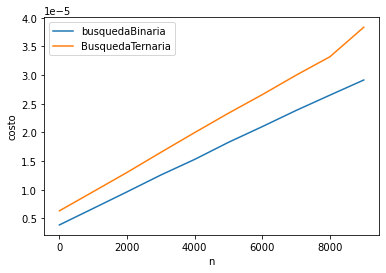

In [102]:

n_min = 0
n_max = 10000
st = 1000
iteraciones = 10 # iteraciones del benchmark
array = generateArrayOrdenado(10000)
t_busquedaBinaria_1 = GenerateListForMicrobench(busquedaBinaria,iteraciones,n_min,n_max,array)
t_busquedaTernaria_1 = GenerateListForMicrobench(busquedaTernaria,iteraciones,n_min,n_max,array)

    
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_busquedaBinaria_1, label = 'busquedaBinaria')
plt.xlabel('n')
plt.ylabel('costo')
plt.plot(eje_x, t_busquedaTernaria_1, label = 'BusquedaTernaria')
plt.legend()
